<a href="https://colab.research.google.com/github/ihebbennaceur/supervised/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
df=pd.read_excel('https://cdn.theforage.com/vinternships/companyassets/ifobHAoMjQs9s6bKS/5XsFFJu2oCLdmYJW2/1654309626143/Online%20Retail%20Data%20Set.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [45]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# ***Clearning data removing negative quantits and unit prices belo 0***

In [46]:
# Remove rows with negative quantities
df = df[df['Quantity'] >= 1]

# Remove rows with unit prices below $0
df = df[df['UnitPrice'] >= 0]

## ***Create a new column 'Total' by multiplying 'Quantity' and 'UnitPrice'***

In [47]:
# Create a new column 'Total' by multiplying 'Quantity' and 'UnitPrice'
df['Total'] = df['Quantity'] * df['UnitPrice']


# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## ***Filter data for the year 2011***

In [48]:
# Filter data for the year 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Group data by month and calculate total revenue for each month
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Total'].sum()

## ***Create a time series line chart***

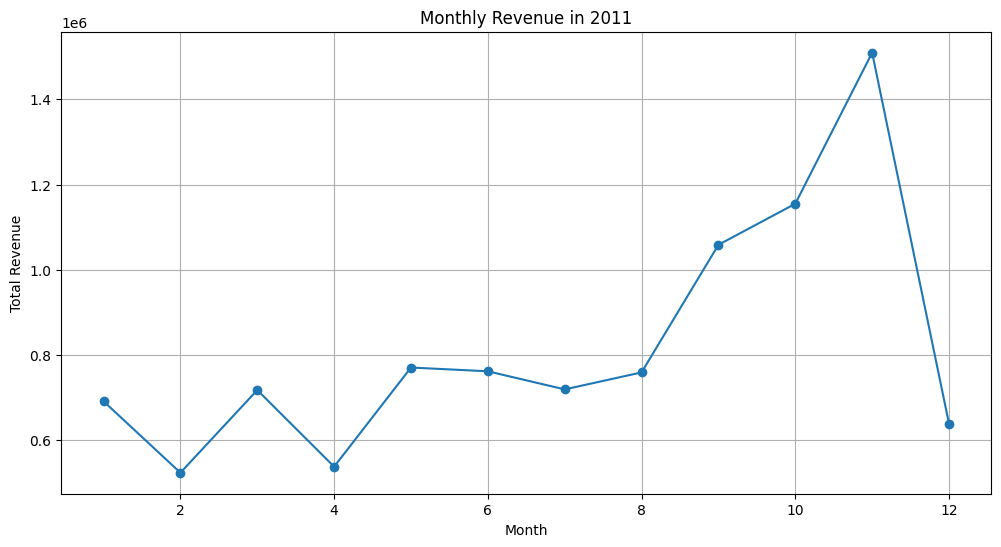

In [49]:
# Create a time series line chart
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue in 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


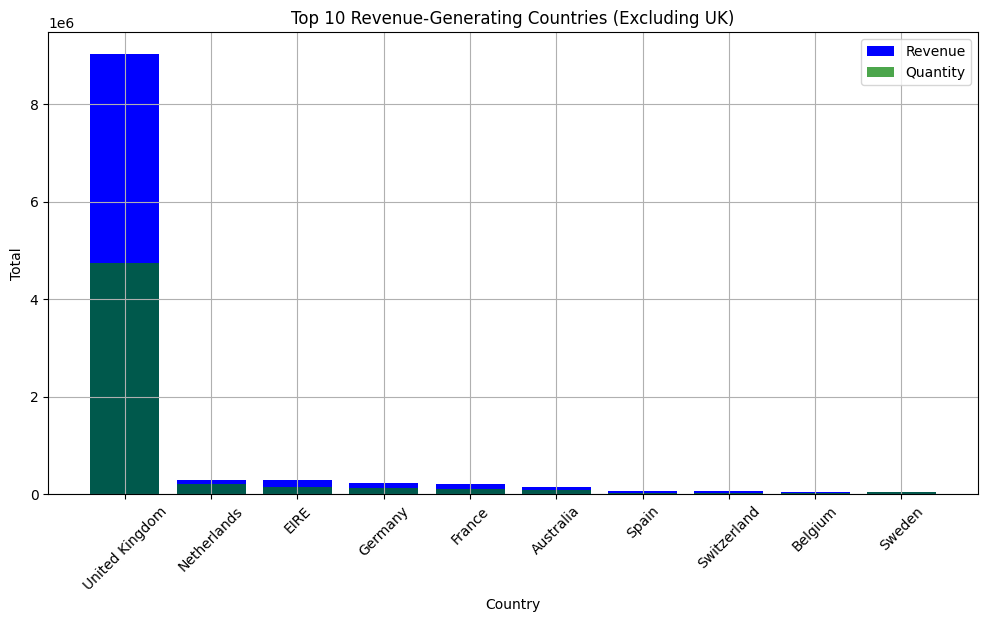

In [50]:
# Group data by country and calculate total revenue and total quantity for each country
country_revenue_quantity = df.groupby('Country').agg({'Total': 'sum', 'Quantity': 'sum'}).reset_index()

# Sort the data by total revenue in descending order to get the top 10 countries
top_10_countries = country_revenue_quantity.sort_values(by='Total', ascending=False).head(10)

# Create a bar chart with revenue and quantity
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Total'], label='Revenue', color='b')
plt.bar(top_10_countries['Country'], top_10_countries['Quantity'], label='Quantity', color='g', alpha=0.7)
plt.title('Top 10 Revenue-Generating Countries (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [51]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


## ***Sort the data by total revenue in descending order to get the top customers***

In [52]:
# Sort the data by total revenue in descending order to get the top customers
top_10_customers = df.sort_values(by='Total', ascending=False).head(10)
display(top_10_customers)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.00


In [53]:
top_10_customers['CustomerID'].unique()

array([16446., 12346., 15098.,    nan, 16029., 17450., 15749., 14646.])

In [54]:
top_10_customers['Total'].unique()

array([168469.6 ,  77183.6 ,  38970.  ,  13541.33,  11062.06,   8142.75,
         7144.72,   6539.4 ,   4992.  ])

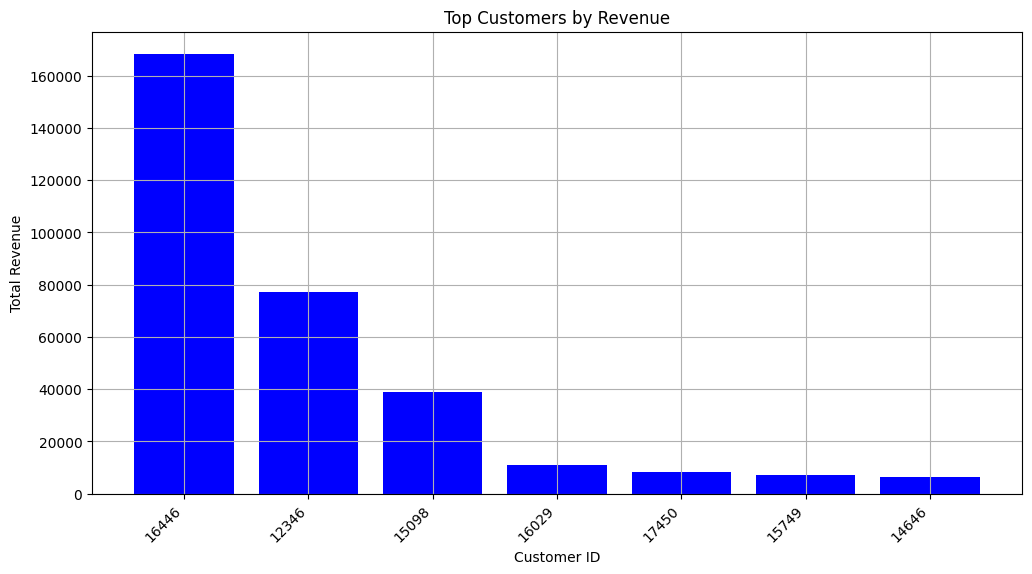

In [57]:
import numpy as np
# Sample data based on your provided unique values
data = {'CustomerID': [16446, 12346, 15098, np.nan, 16029, 17450, 15749, 14646],
        'Total': [168469.6, 77183.6, 38970, 13541.33, 11062.06, 8142.75, 7144.72, 6539.4]}

# Create a DataFrame from the provided data
df2 = pd.DataFrame(data)

# Drop rows with NaN values in 'CustomerID'
df2.dropna(subset=['CustomerID'], inplace=True)

# Sort the data by 'Total' in descending order to get the top customers
df2 = df2.sort_values(by='Total', ascending=False)

# Create a bar chart with 'Total' on the y-axis and 'CustomerID' on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(df2['CustomerID'].astype(int).astype(str), df2['Total'], color='b')
plt.title('Top Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


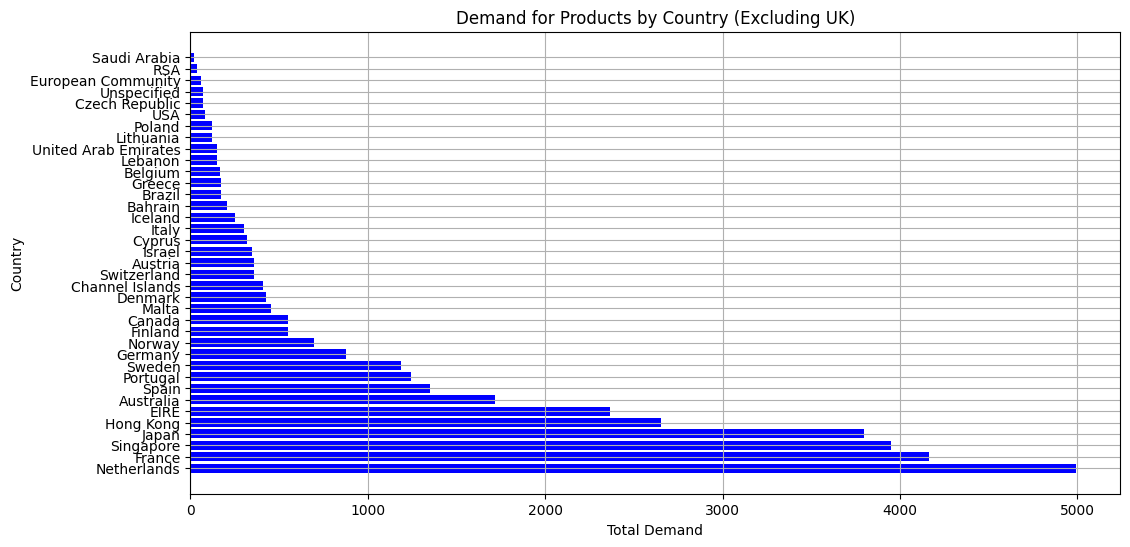

In [58]:
# Sort the data by total demand in descending order
df_sorted = df[df['Country'] != 'United Kingdom'].sort_values(by='Total', ascending=False)

# Create a horizontal bar chart with 'Total' on the x-axis and 'Country' on the y-axis
plt.figure(figsize=(12, 6))
plt.barh(df_sorted['Country'], df_sorted['Total'], color='b')
plt.title('Demand for Products by Country (Excluding UK)')
plt.xlabel('Total Demand')
plt.ylabel('Country')
plt.grid(True)
plt.show()

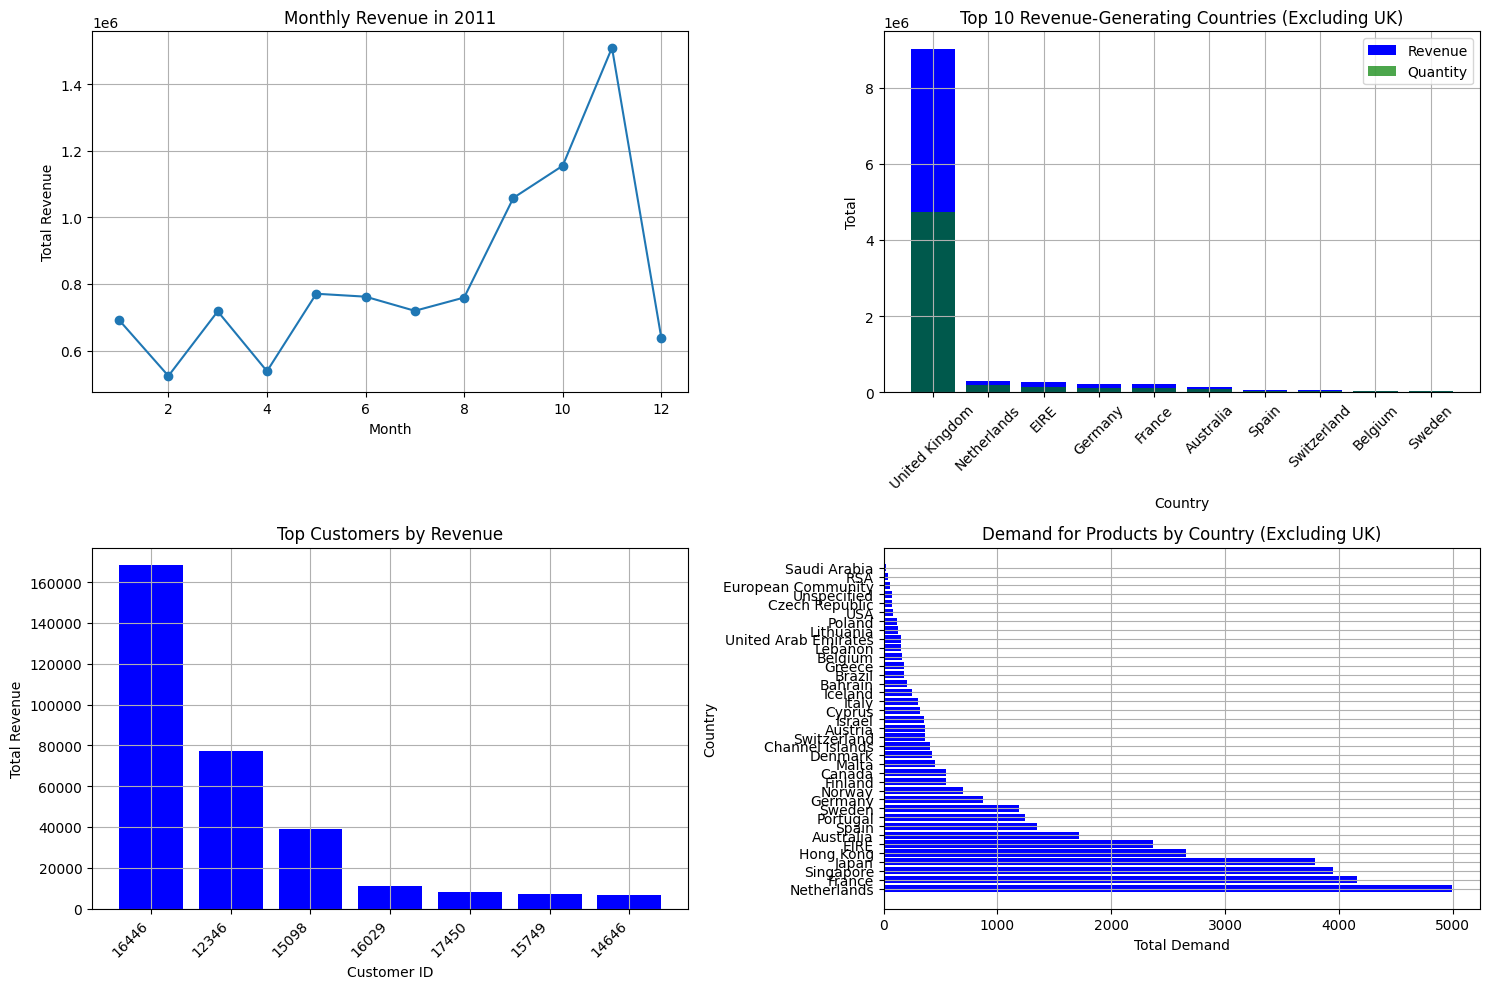

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time series line chart
plt.figure(figsize=(15, 10))

# Subplot 1: Monthly Revenue in 2011
plt.subplot(2, 2, 1)
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue in 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Subplot 2: Top 10 Revenue-Generating Countries (Excluding UK)
plt.subplot(2, 2, 2)
plt.bar(top_10_countries['Country'], top_10_countries['Total'], label='Revenue', color='b')
plt.bar(top_10_countries['Country'], top_10_countries['Quantity'], label='Quantity', color='g', alpha=0.7)
plt.title('Top 10 Revenue-Generating Countries (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 3: Top Customers by Revenue
plt.subplot(2, 2, 3)
plt.bar(df2['CustomerID'].astype(int).astype(str), df2['Total'], color='b')
plt.title('Top Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Subplot 4: Demand for Products by Country (Excluding UK)
plt.subplot(2, 2, 4)
plt.barh(df_sorted['Country'], df_sorted['Total'], color='b')
plt.title('Demand for Products by Country (Excluding UK)')
plt.xlabel('Total Demand')
plt.ylabel('Country')
plt.grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [62]:
pip install plotly

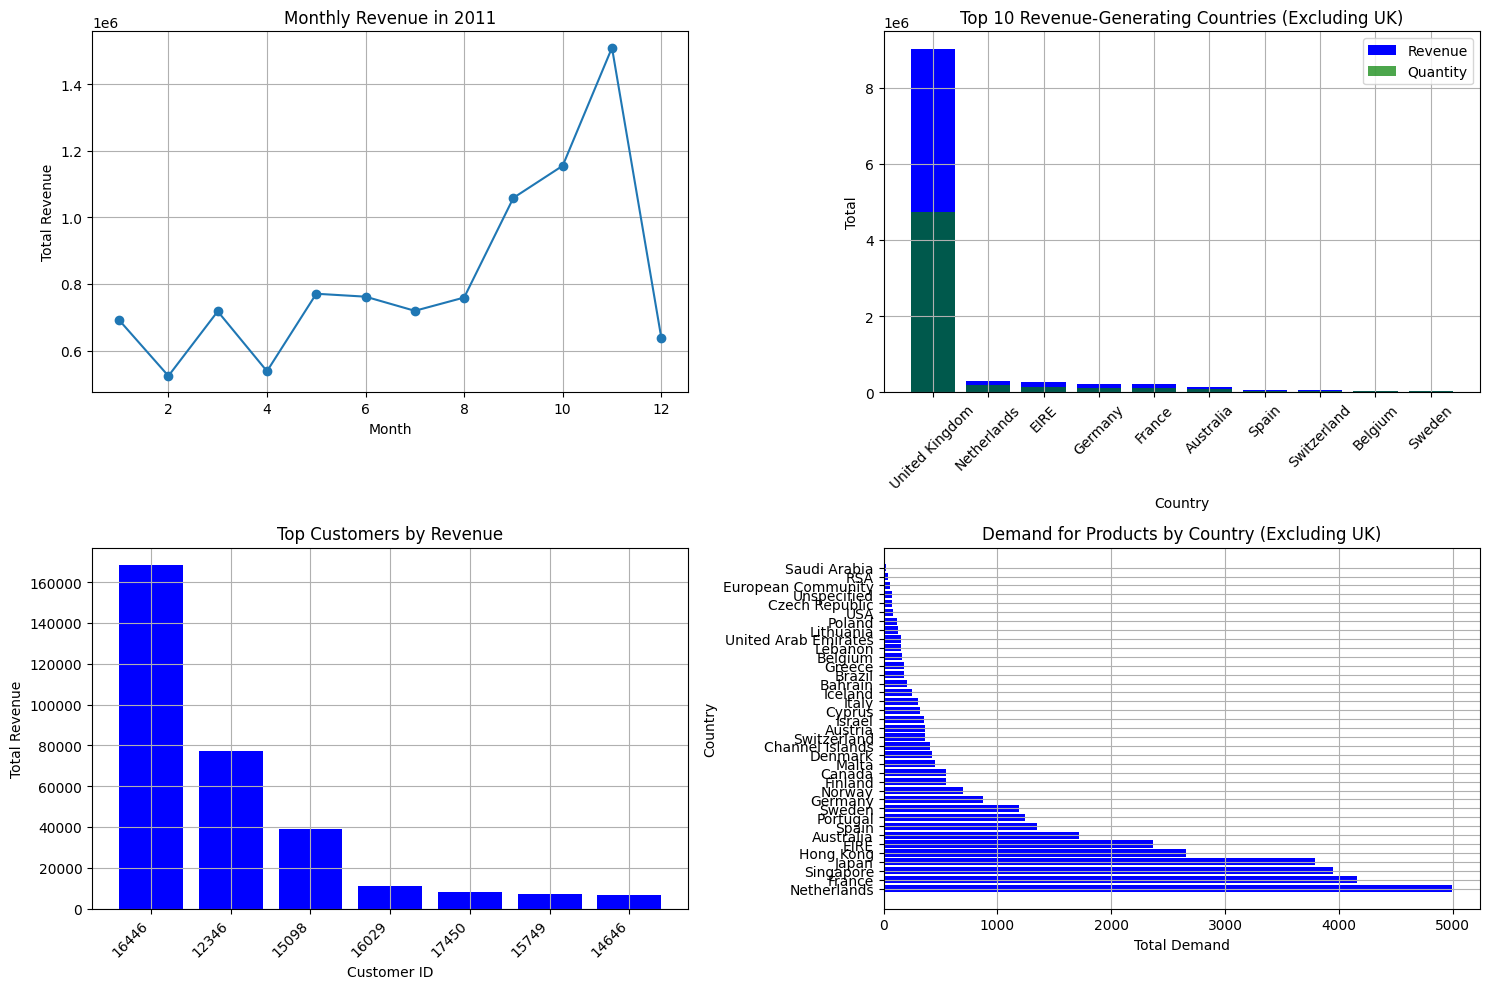

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Create a time series line chart
plt.figure(figsize=(15, 10))

# Subplot 1: Monthly Revenue in 2011
plt.subplot(2, 2, 1)
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue in 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Subplot 2: Top 10 Revenue-Generating Countries (Excluding UK)
plt.subplot(2, 2, 2)
plt.bar(top_10_countries['Country'], top_10_countries['Total'], label='Revenue', color='b')
plt.bar(top_10_countries['Country'], top_10_countries['Quantity'], label='Quantity', color='g', alpha=0.7)
plt.title('Top 10 Revenue-Generating Countries (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 3: Top Customers by Revenue
plt.subplot(2, 2, 3)
plt.bar(df2['CustomerID'].astype(int).astype(str), df2['Total'], color='b')
plt.title('Top Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Subplot 4: Demand for Products by Country (Excluding UK)
plt.subplot(2, 2, 4)
plt.barh(df_sorted['Country'], df_sorted['Total'], color='b')
plt.title('Demand for Products by Country (Excluding UK)')
plt.xlabel('Total Demand')
plt.ylabel('Country')
plt.grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots

# Create a subplot grid with Plotly
fig = make_subplots(rows=2, cols=2)

# Add traces to the subplot grid
fig.add_trace(go.Scatter(x=monthly_revenue.index, y=monthly_revenue.values, mode='lines+markers', name='Monthly Revenue'),
              row=1, col=1)
fig.add_trace(go.Bar(x=top_10_countries['Country'], y=top_10_countries['Total'], name='Revenue', marker=dict(color='blue')),
              row=1, col=2)
fig.add_trace(go.Bar(x=df2['CustomerID'].astype(int).astype(str), y=df2['Total'], name='Top Customers by Revenue', marker=dict(color='green')),
              row=2, col=1)
fig.add_trace(go.Bar(y=df_sorted['Country'], x=df_sorted['Total'], orientation='h', name='Demand for Products by Country (Excluding UK)', marker=dict(color='blue')),
              row=2, col=2)

# Update subplot titles and labels
fig.update_layout(title_text="Combined Plots")
fig.update_xaxes(title_text="X-Axis Label")
fig.update_yaxes(title_text="Y-Axis Label")

# Save the figure as an HTML file
pio.write_html(fig, file="combined_plots.html")
